In [1]:
!pip install ultralytics  -q
!pip install zip_files -q

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from ultralytics import YOLO

# Dataset Preview

## Test Images

In [3]:
image_dir = '/kaggle/input/dataset-final-corrected-beneran/test/images'
label_dir = '/kaggle/input/dataset-final-corrected-beneran/test/labels'

In [6]:
color_map = {
    0: 'r',  # Class 0 in red
    1: 'g',  # Class 1 in green
}

def load_bounding_boxes(label_file):
    """
    Load bounding boxes from a label file.
    The file format is assumed to be: class_id center_x center_y width height
    """
    bboxes = []
    with open(label_file, 'r') as file:
        for line in file:
            parts = line.strip().split()
            class_id = int(parts[0])
            center_x, center_y, width, height = map(float, parts[1:])
            bboxes.append((class_id, center_x, center_y, width, height))
    return bboxes

def plot_image_with_bboxes(image_path, bboxes):
    """
    Plot an image with bounding boxes.
    """
    image = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    
    # Get image dimensions
    img_width, img_height = image.size
    
    # Plot each bounding box
    for bbox in bboxes:
        class_id, center_x, center_y, width, height = bbox
        # Convert bounding box format from center_x, center_y, width, height to xmin, ymin, width, height
        xmin = (center_x - width / 2) * img_width
        ymin = (center_y - height / 2) * img_height
        width *= img_width
        height *= img_height
        
        # Get the color for the current class
        color = color_map.get(class_id, 'w')  # Default to white if class_id not found
        
        # Create a rectangle patch
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor=color, facecolor='none')
        ax.add_patch(rect)
    
    plt.show()

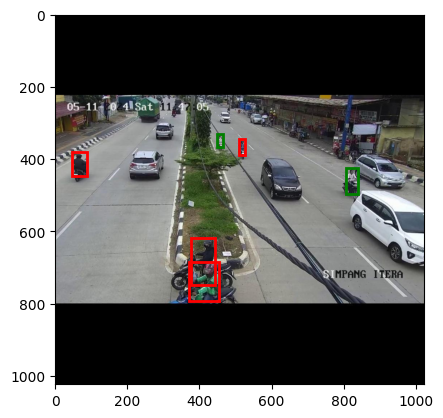

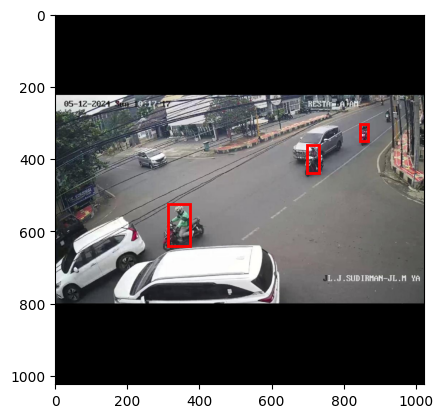

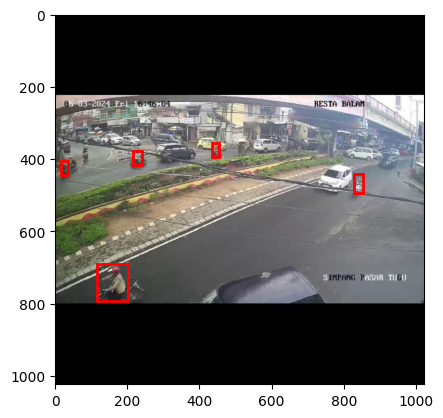

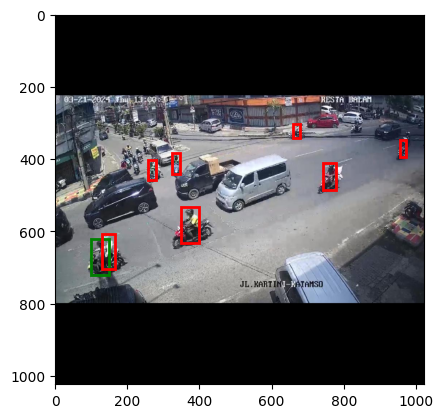

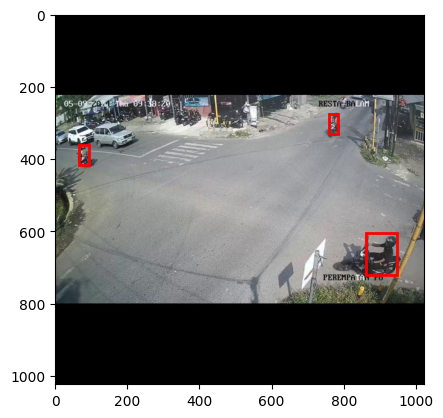

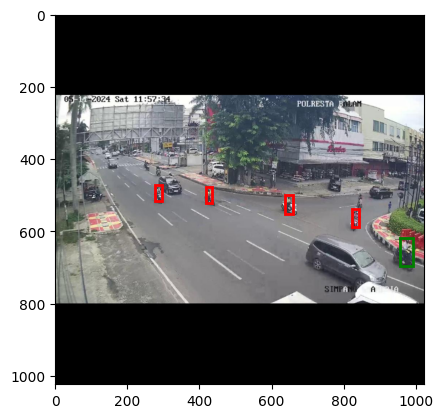

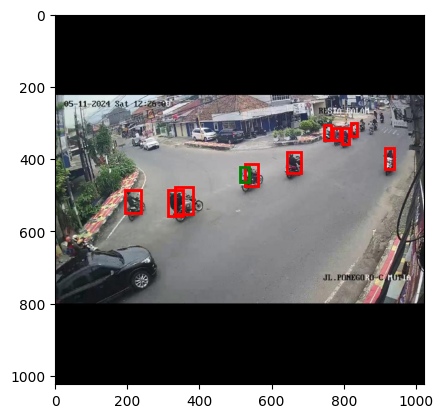

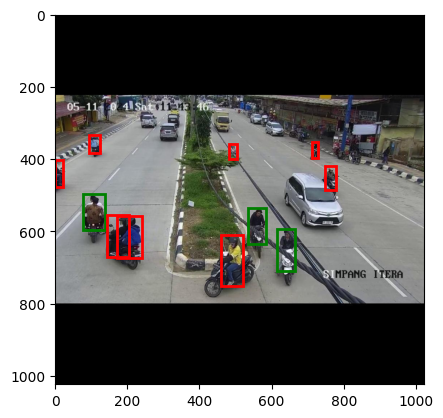

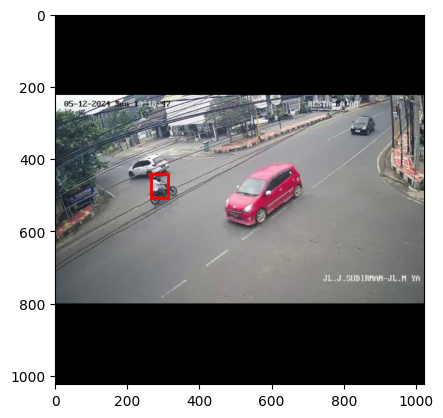

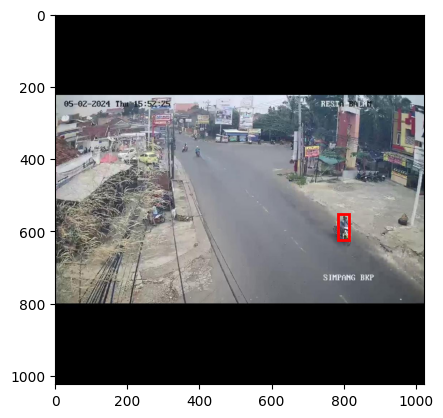

In [10]:
# List the image files
image_files = os.listdir(image_dir)[40:50]  # Get the first 10 images

# Display each image with its bounding boxes
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    label_file = os.path.join(label_dir, os.path.splitext(image_file)[0] + '.txt')
    
    if os.path.exists(label_file):
        bboxes = load_bounding_boxes(label_file)
        plot_image_with_bboxes(image_path, bboxes)
    else:
        print(f"No label file found for {image_file}")

## Valid Images

In [11]:
image_dir = '/kaggle/input/dataset-final-corrected-beneran/valid/images'
label_dir = '/kaggle/input/dataset-final-corrected-beneran/valid/labels'

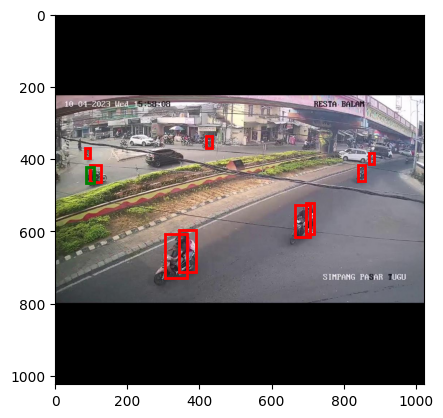

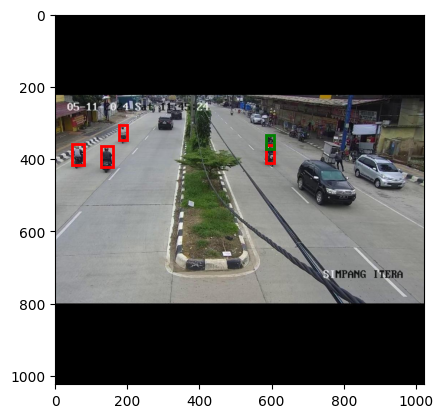

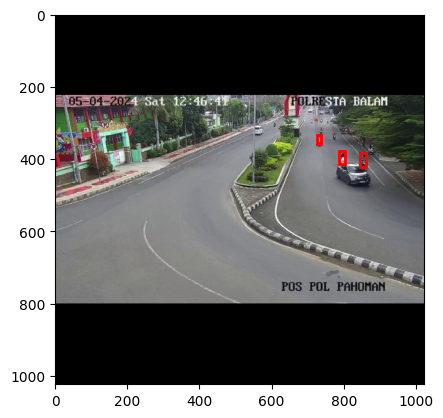

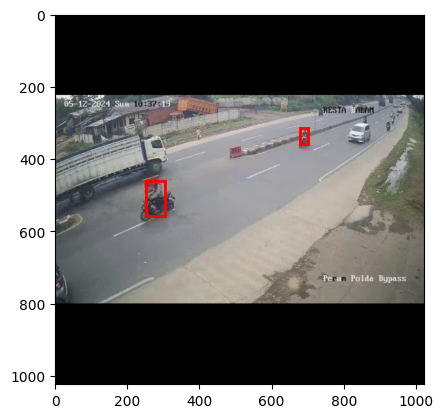

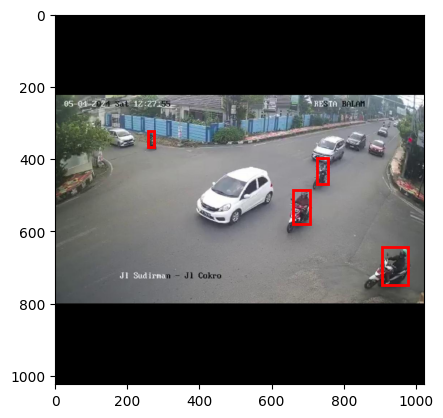

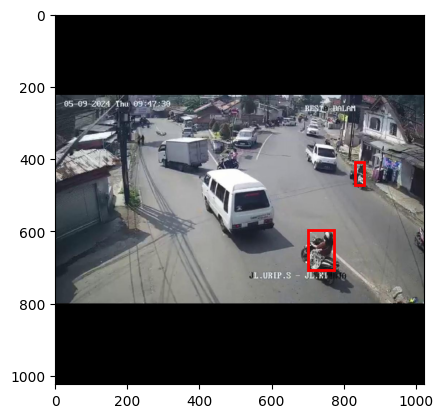

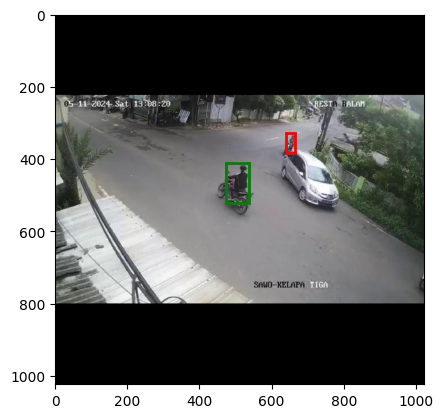

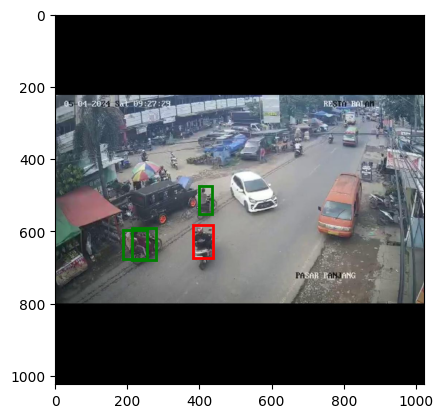

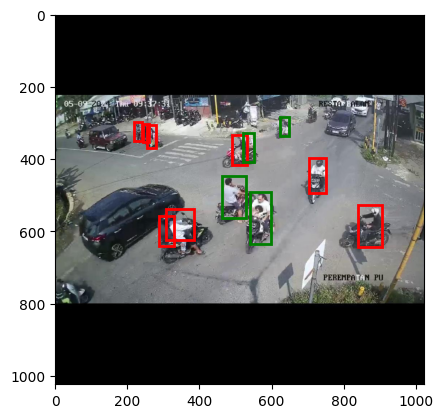

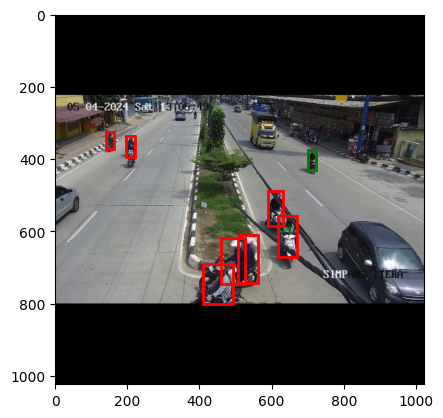

In [12]:
# List the image files
image_files = os.listdir(image_dir)[40:50]  # Get the first 10 images

# Display each image with its bounding boxes
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    label_file = os.path.join(label_dir, os.path.splitext(image_file)[0] + '.txt')
    
    if os.path.exists(label_file):
        bboxes = load_bounding_boxes(label_file)
        plot_image_with_bboxes(image_path, bboxes)
    else:
        print(f"No label file found for {image_file}")

# Train Images - Before Augmentation

In [17]:
image_dir = '/kaggle/input/dataset-raw/train/images'
label_dir = '/kaggle/input/dataset-raw/train/labels'

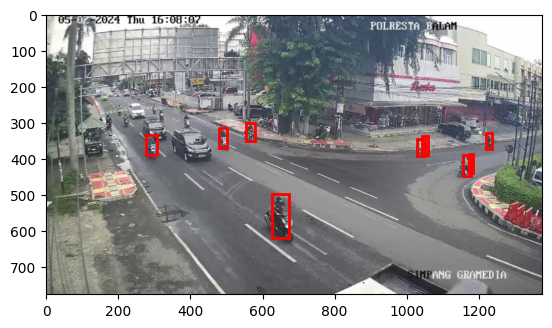

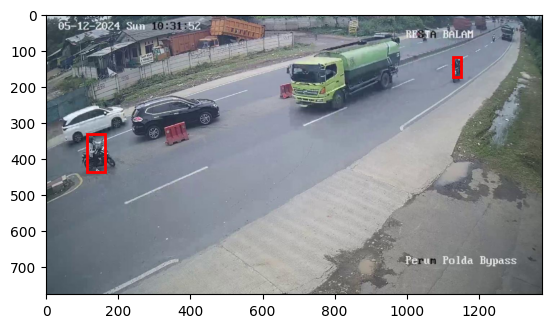

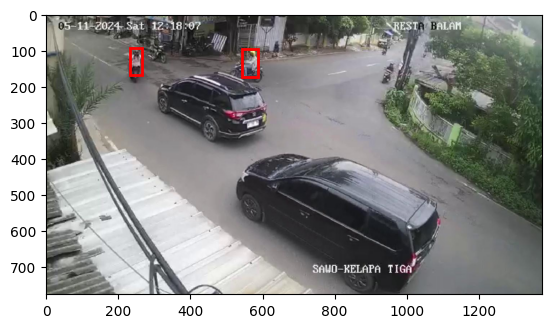

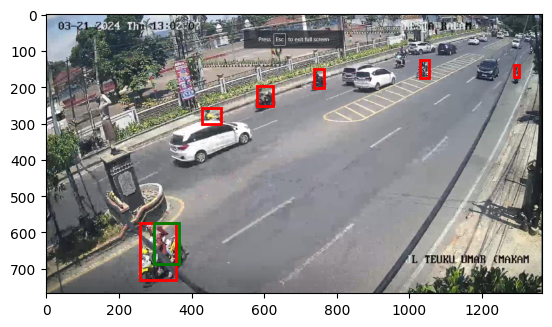

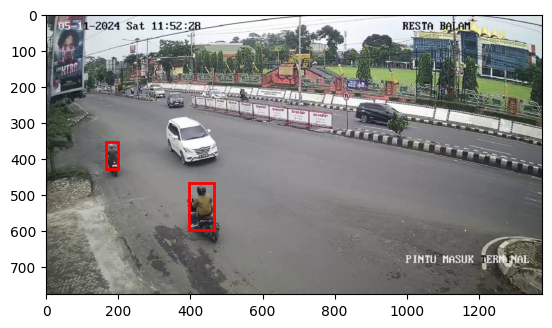

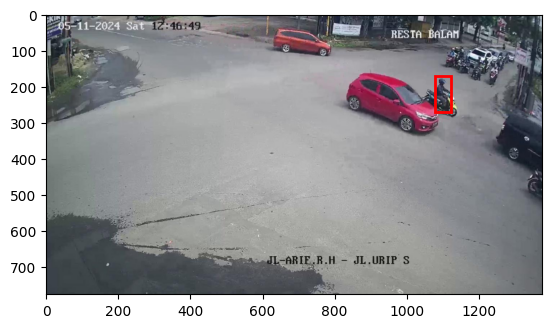

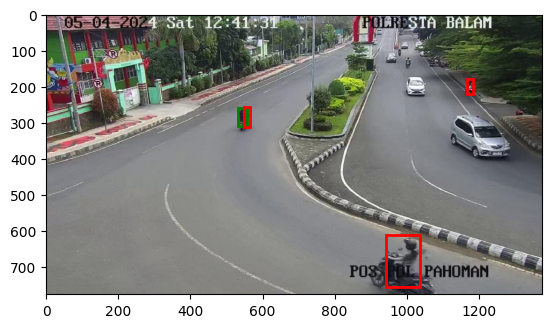

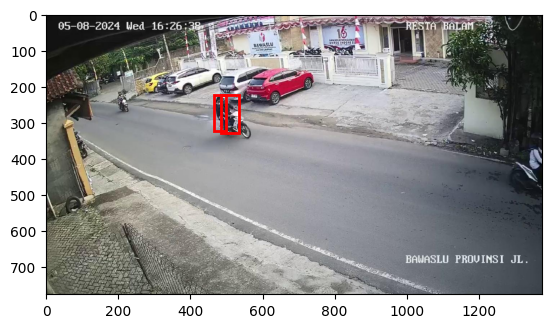

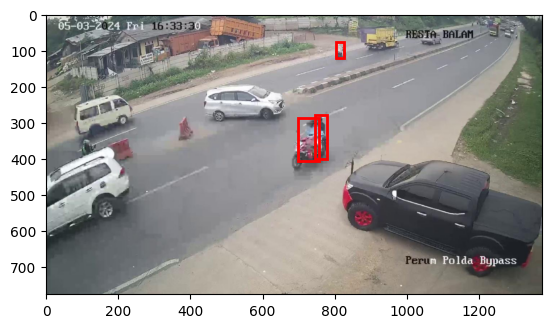

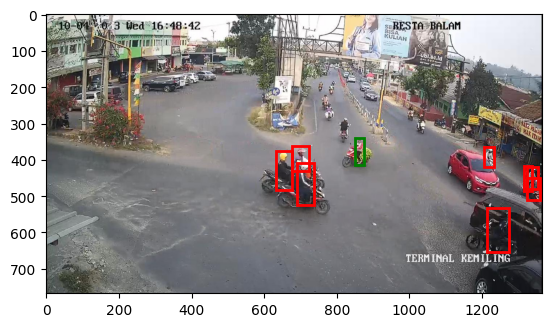

In [18]:
# List the image files
image_files = os.listdir(image_dir)[40:50]  # Get the first 10 images

# Display each image with its bounding boxes
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    label_file = os.path.join(label_dir, os.path.splitext(image_file)[0] + '.txt')
    
    if os.path.exists(label_file):
        bboxes = load_bounding_boxes(label_file)
        plot_image_with_bboxes(image_path, bboxes)
    else:
        print(f"No label file found for {image_file}")

# Train Images - After Augmentation

In [14]:
image_dir = '/kaggle/input/dataset-final-corrected-beneran/train/images'
label_dir = '/kaggle/input/dataset-final-corrected-beneran/train/labels'

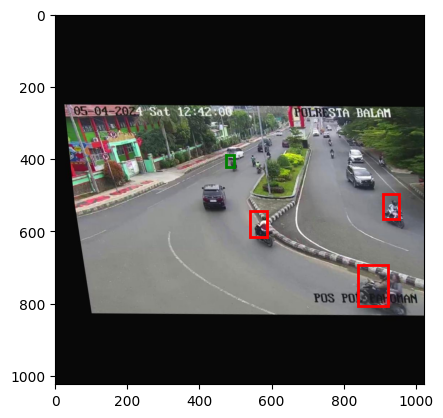

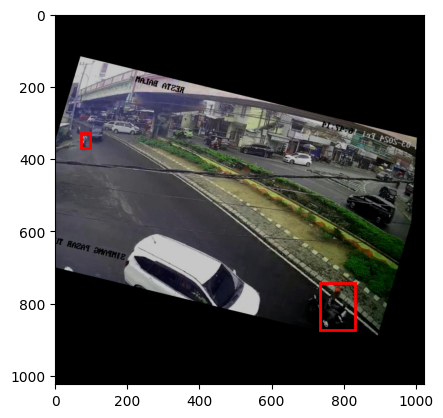

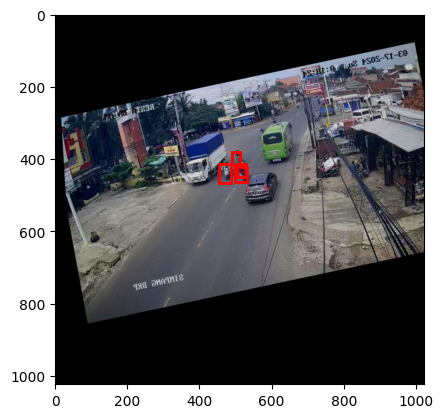

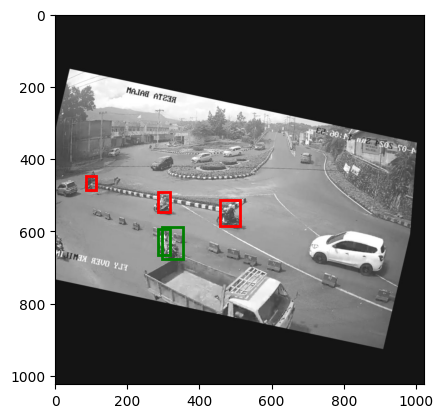

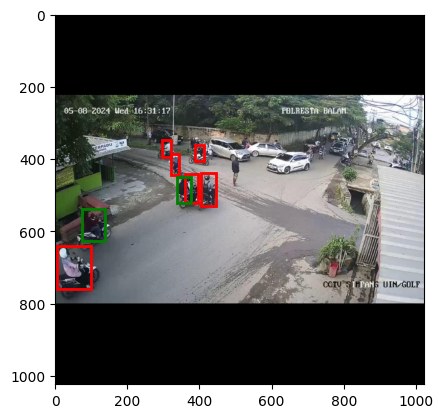

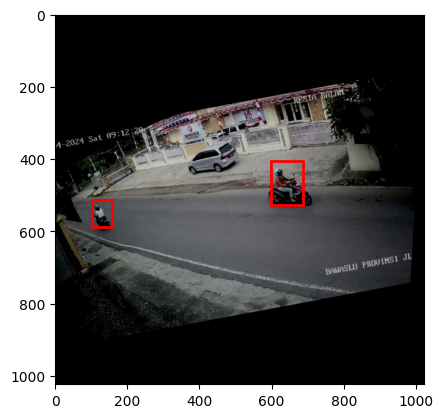

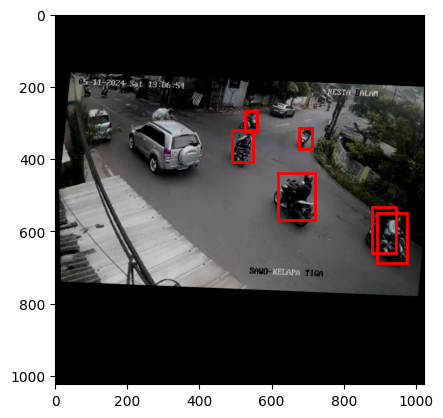

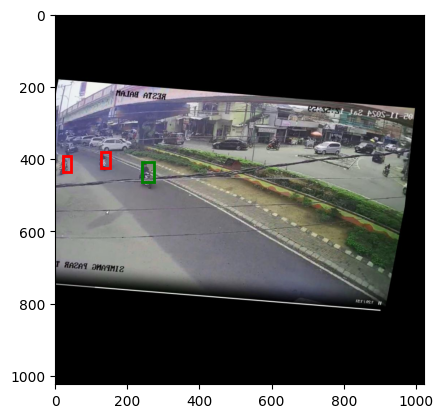

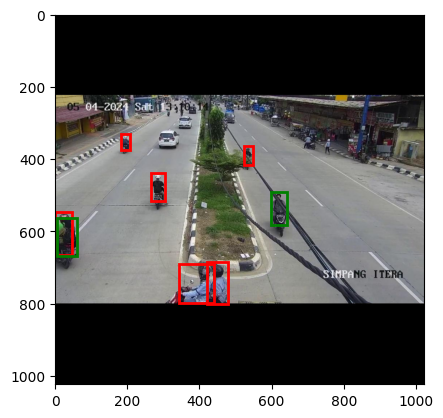

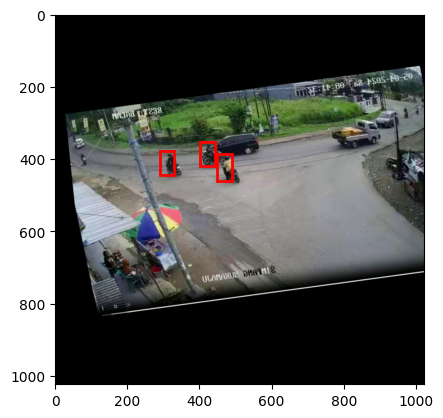

In [15]:
# List the image files
image_files = os.listdir(image_dir)[40:50]  # Get the first 10 images

# Display each image with its bounding boxes
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    label_file = os.path.join(label_dir, os.path.splitext(image_file)[0] + '.txt')
    
    if os.path.exists(label_file):
        bboxes = load_bounding_boxes(label_file)
        plot_image_with_bboxes(image_path, bboxes)
    else:
        print(f"No label file found for {image_file}")

### Image Count

In [19]:
train_image_dir_noaug = '/kaggle/input/dataset-raw/train/images'
train_image_dir_aug = '/kaggle/input/dataset-final-corrected-beneran/train/images'
valid_image_dir = '/kaggle/input/dataset-final-corrected-beneran/valid/images'
test_image_dir = '/kaggle/input/dataset-final-corrected-beneran/test/images'

# Count the number of images
num_train_images_noaug = len([f for f in os.listdir(train_image_dir_noaug) if os.path.isfile(os.path.join(train_image_dir_noaug, f))])
num_train_images_aug = len([f for f in os.listdir(train_image_dir_aug) if os.path.isfile(os.path.join(train_image_dir_aug, f))])
num_valid_images = len([f for f in os.listdir(valid_image_dir) if os.path.isfile(os.path.join(valid_image_dir, f))])
num_test_images = len([f for f in os.listdir(test_image_dir) if os.path.isfile(os.path.join(test_image_dir, f))])

print(f"Total number of images in the training set - Before Augmentation: {num_train_images_noaug}")
print(f"Total number of images in the training set - After Augmentation: {num_train_images_aug}")
print(f"Total number of images in the validation set: {num_valid_images}")
print(f"Total number of images in the test set: {num_test_images}")

Total number of images in the training set - Before Augmentation: 1852
Total number of images in the training set - After Augmentation: 9231
Total number of images in the validation set: 523
Total number of images in the test set: 277


# Training Dataset with YOLOv8 Standar

In [8]:
os.environ['WANDB_MODE'] = 'disabled'

In [9]:
model = YOLO('yolov8n.pt')

data = '/kaggle/input/dataset-final-corrected-beneran/data.yaml'

results = model.train(data=data, epochs=70, imgsz=1024, plots = True, optimizer = 'AdamW')

100%|██████████| 6.23M/6.23M [00:00<00:00, 98.0MB/s]

Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/dataset-final-corrected-beneran/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=F

2024-06-13 06:37:03,504	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-13 06:37:04,307	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/dataset-final-corrected-beneran/train/labels... 9231 images, 160 backgrounds, 0 corrupt: 100%|██████████| 9231/9231 [00:54<00:00, 170.30it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/dataset-final-corrected-beneran/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/dataset-final-corrected-beneran/valid/labels... 523 images, 16 backgrounds, 0 corrupt: 100%|██████████| 523/523 [00:00<00:00, 904.58it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/dataset-final-corrected-beneran/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      5.55G      2.235      2.116      1.671         75       1024: 100%|██████████| 577/577 [03:59<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.21it/s]


                   all        523       2246       0.25      0.378      0.299      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      5.31G      2.175       1.98      1.659        114       1024: 100%|██████████| 577/577 [03:51<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.28it/s]


                   all        523       2246      0.817      0.302      0.358      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      5.31G      2.093      1.896      1.603         86       1024: 100%|██████████| 577/577 [03:49<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.31it/s]


                   all        523       2246      0.861      0.356      0.423       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      5.31G      2.056      1.848      1.585        115       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.35it/s]

                   all        523       2246      0.833      0.372      0.439      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      5.31G      2.011      1.792      1.561        100       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.18it/s]


                   all        523       2246       0.84      0.386      0.456       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      5.29G      1.974      1.743      1.536        122       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.32it/s]


                   all        523       2246      0.387      0.518      0.501      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      5.46G      1.964      1.713      1.528         98       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.33it/s]

                   all        523       2246      0.531      0.571      0.559      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      5.29G      1.946      1.684       1.53         88       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.32it/s]

                   all        523       2246      0.595       0.62      0.633      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      5.29G       1.92      1.646      1.511         78       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.26it/s]


                   all        523       2246      0.595       0.61      0.643      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      5.28G      1.917      1.622      1.504         93       1024: 100%|██████████| 577/577 [03:48<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.28it/s]


                   all        523       2246      0.658      0.633      0.683      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70       5.3G        1.9      1.605      1.489         60       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.34it/s]

                   all        523       2246       0.68      0.653      0.712      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      5.29G      1.873      1.557      1.475         87       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.19it/s]

                   all        523       2246      0.632      0.639      0.668      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      5.41G      1.858      1.554      1.468         66       1024: 100%|██████████| 577/577 [03:48<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.28it/s]

                   all        523       2246      0.708      0.636      0.712      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      5.28G      1.858      1.542      1.468         82       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.23it/s]

                   all        523       2246      0.693       0.68      0.728      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      5.44G      1.849      1.542      1.453         58       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.35it/s]

                   all        523       2246      0.697      0.675      0.722        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      5.29G      1.831      1.517      1.448         85       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.33it/s]

                   all        523       2246      0.764      0.685      0.773      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      5.29G       1.83      1.506       1.45        101       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.36it/s]

                   all        523       2246      0.755      0.665      0.756      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      5.28G      1.821        1.5      1.449         83       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.23it/s]

                   all        523       2246      0.742      0.703      0.775      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70       5.3G       1.81      1.481      1.433         74       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.31it/s]

                   all        523       2246      0.746      0.705      0.771      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      5.29G      1.808      1.472      1.432         64       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.31it/s]

                   all        523       2246      0.741      0.717      0.777      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      5.29G      1.791      1.458      1.422         54       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.27it/s]

                   all        523       2246      0.773      0.723      0.788      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      5.28G      1.787      1.439      1.418         71       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.26it/s]

                   all        523       2246      0.724      0.764      0.801      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70       5.3G      1.789      1.427      1.422        124       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.45it/s]

                   all        523       2246      0.775      0.738      0.806      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      5.29G      1.777      1.414      1.411         64       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.36it/s]

                   all        523       2246      0.794      0.724      0.807      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      5.29G      1.762      1.399      1.399        102       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.28it/s]

                   all        523       2246      0.801      0.725      0.811      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      5.28G      1.769      1.401      1.406         44       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.28it/s]

                   all        523       2246      0.777      0.748        0.8      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70       5.3G      1.746      1.358      1.392         77       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]

                   all        523       2246       0.76      0.761      0.821        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      5.29G      1.738      1.359      1.388         98       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.33it/s]

                   all        523       2246      0.778      0.754      0.815      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      5.42G      1.728      1.338      1.383        109       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.14it/s]

                   all        523       2246       0.82      0.726      0.825      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      5.28G      1.716      1.322      1.373         96       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.34it/s]

                   all        523       2246      0.795      0.757      0.823      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70       5.3G      1.719      1.318      1.378        100       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.29it/s]

                   all        523       2246      0.785      0.741      0.819      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      5.29G      1.715      1.302      1.371         90       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.24it/s]

                   all        523       2246      0.782      0.758      0.821      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      5.42G      1.691      1.274       1.36        109       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.40it/s]

                   all        523       2246       0.83      0.724      0.833      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      5.28G      1.687      1.273      1.355         66       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.36it/s]

                   all        523       2246      0.796       0.76      0.829      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      5.44G      1.679      1.264      1.351        101       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.32it/s]

                   all        523       2246      0.789       0.76      0.825       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      5.44G      1.682      1.263      1.347         90       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.34it/s]

                   all        523       2246      0.805      0.747      0.829      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      5.29G      1.671      1.251      1.345         97       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.33it/s]

                   all        523       2246      0.811      0.736      0.825       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      5.28G      1.666      1.243      1.342         77       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.29it/s]

                   all        523       2246      0.815      0.771      0.834      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70       5.3G       1.66      1.233      1.336         60       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.31it/s]

                   all        523       2246      0.833      0.763      0.846      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      5.29G      1.652      1.217      1.332         77       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.18it/s]

                   all        523       2246      0.804      0.772      0.845      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      5.29G      1.642      1.211      1.325        105       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.32it/s]

                   all        523       2246      0.807      0.779      0.842       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      5.28G      1.632      1.198      1.312         81       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.24it/s]

                   all        523       2246      0.807       0.78       0.85      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70       5.3G      1.634      1.197      1.315         74       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.24it/s]

                   all        523       2246      0.806      0.772      0.849      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      5.29G      1.621      1.178      1.306         82       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.40it/s]

                   all        523       2246      0.832      0.768       0.85      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      5.29G      1.628      1.182      1.311        120       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.29it/s]

                   all        523       2246      0.807      0.777      0.851      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      5.28G      1.612      1.169      1.303         66       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.34it/s]

                   all        523       2246      0.804      0.772      0.853      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70       5.3G      1.605      1.155      1.294         78       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.31it/s]

                   all        523       2246      0.831      0.755      0.846      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      5.29G      1.604      1.148      1.294         69       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]

                   all        523       2246      0.824      0.771      0.852      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      5.29G        1.6      1.146      1.292         97       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]

                   all        523       2246      0.814      0.773      0.856       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      5.28G      1.585      1.132       1.28         77       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.41it/s]

                   all        523       2246      0.808      0.789      0.858      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70       5.3G      1.585      1.124      1.283        112       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.29it/s]

                   all        523       2246      0.832      0.771      0.861      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      5.29G      1.578      1.121      1.275         86       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]

                   all        523       2246      0.841      0.767      0.861      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      5.29G      1.582      1.119      1.282         71       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.31it/s]

                   all        523       2246      0.851      0.765      0.864      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      5.41G      1.573      1.105      1.275         76       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.16it/s]

                   all        523       2246      0.848      0.762      0.864       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70       5.3G      1.563      1.103      1.266         74       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]

                   all        523       2246      0.827      0.772       0.86      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      5.29G      1.554      1.092      1.263         61       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.29it/s]

                   all        523       2246      0.813      0.793      0.862       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      5.29G      1.553      1.091       1.26         63       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.41it/s]

                   all        523       2246      0.841      0.774      0.862       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      5.28G      1.548      1.079      1.257        116       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.29it/s]

                   all        523       2246      0.817      0.788      0.859      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70       5.3G      1.542      1.076      1.257        112       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.34it/s]

                   all        523       2246      0.838       0.76      0.856      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      5.29G      1.534      1.069      1.243         65       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]

                   all        523       2246      0.834      0.779      0.858      0.658


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      5.59G      1.512      1.043      1.285         74       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]

                   all        523       2246      0.853      0.757      0.861      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      5.28G      1.494      1.018      1.277         75       1024: 100%|██████████| 577/577 [03:44<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.28it/s]

                   all        523       2246      0.835      0.769      0.857      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70       5.3G      1.483      1.008      1.272         60       1024: 100%|██████████| 577/577 [03:44<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.32it/s]

                   all        523       2246      0.837      0.768      0.856      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      5.29G      1.468     0.9966      1.262         52       1024: 100%|██████████| 577/577 [03:44<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.37it/s]

                   all        523       2246      0.848      0.761      0.857      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      5.29G      1.458     0.9908      1.254         52       1024: 100%|██████████| 577/577 [03:45<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.38it/s]

                   all        523       2246      0.821      0.783      0.859      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      5.28G      1.458     0.9814      1.256         53       1024: 100%|██████████| 577/577 [03:45<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.22it/s]

                   all        523       2246      0.824      0.779      0.859      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70       5.3G      1.448     0.9742      1.249         66       1024: 100%|██████████| 577/577 [03:45<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.28it/s]

                   all        523       2246      0.829      0.774      0.857      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      5.29G      1.443     0.9757      1.248         79       1024: 100%|██████████| 577/577 [03:45<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.24it/s]

                   all        523       2246      0.826       0.77      0.857      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      5.29G      1.441     0.9675      1.248         57       1024: 100%|██████████| 577/577 [03:45<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.40it/s]

                   all        523       2246      0.826      0.769      0.855      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      5.28G      1.429     0.9627       1.24         65       1024: 100%|██████████| 577/577 [03:45<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.18it/s]

                   all        523       2246       0.82       0.77      0.856      0.655



70 epochs completed in 4.556 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:09<00:00,  1.81it/s]


                   all        523       2246      0.848      0.762      0.864       0.66
                     0        488       1844      0.909      0.871      0.954       0.75
                     1        234        402      0.787      0.652      0.775       0.57
Speed: 0.4ms preprocess, 4.7ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train


## Evaluation

In [8]:
model_standar = YOLO('/kaggle/input/model-yolov8/Standar-COCO/best.pt')

# Validate the model
metrics_valid_standar = model_standar.val(data= '/kaggle/input/dataset-raw/data.yaml')
metrics_test_standar = model_standar.val(data= '/kaggle/input/dataset-raw/data.yaml', split = 'test') 

# metrics.box.map    # map50-95
# metrics.box.map50  # map50
# metrics.box.map75  # map75

Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/dataset-raw/valid/labels... 521 images, 15 backgrounds, 0 corrupt: 100%|██████████| 521/521 [00:00<00:00, 566.99it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset-raw/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.24it/s]


                   all        521       2245      0.846       0.76      0.864      0.668
                     0        487       1843      0.908      0.871      0.954      0.761
                     1        234        402      0.784      0.649      0.774      0.575
Speed: 2.0ms preprocess, 5.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val11
Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


val: Scanning /kaggle/input/dataset-raw/test/labels... 281 images, 6 backgrounds, 0 corrupt: 100%|██████████| 281/281 [00:00<00:00, 580.77it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset-raw/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.46it/s]


                   all        281       1095      0.839      0.831      0.872      0.679
                     0        263        917      0.888      0.895      0.949      0.763
                     1        116        178      0.791      0.766      0.795      0.596
Speed: 2.3ms preprocess, 5.5ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val12


In [24]:
print('Validation Dataset Evaluation')
print(f"Precision (B): {metrics_valid_standar.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall (B): {metrics_valid_standar.results_dict['metrics/recall(B)']:.4f}")
print(f"mAP50 (B): {metrics_valid_standar.results_dict['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95 (B): {metrics_valid_standar.results_dict['metrics/mAP50-95(B)']:.4f}")
print('-------------------------------------------------------------------------------')
print('Test Dataset Evaluation')
print(f"Precision (B): {metrics_test_standar.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall (B): {metrics_test_standar.results_dict['metrics/recall(B)']:.4f}")
print(f"mAP50 (B): {metrics_test_standar.results_dict['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95 (B): {metrics_test_standar.results_dict['metrics/mAP50-95(B)']:.4f}")

Validation Dataset Evaluation
Precision (B): 0.8465
Recall (B): 0.7603
mAP50 (B): 0.8638
mAP50-95 (B): 0.6679
-------------------------------------------------------------------------------
Test Dataset Evaluation
Precision (B): 0.8395
Recall (B): 0.8305
mAP50 (B): 0.8721
mAP50-95 (B): 0.6793


# Training Dataset with GA Initiation

In [3]:
os.environ['WANDB_MODE'] = 'disabled'

In [ ]:
model = YOLO('yolov8n.pt')

data = '/kaggle/input/dataset-final-corrected-beneran/data.yaml'

results = model.train(data=data, epochs=70, imgsz=1024, plots = True, optimizer = 'AdamW', name = 'Initial-GA-Run',
                     lr0=0.0042,
                      lrf=0.00947,
                      momentum=0.83111,
                      weight_decay=0.0007,
                      warmup_epochs=3.30073,
                      warmup_momentum=0.63392,
                      box=6.02577,
                      cls=0.40399,
                      dfl=1.28542,
                      hsv_h=0.01741,
                      hsv_s=0.43793,
                      hsv_v=0.48062,
                      degrees=0.0,
                      translate=0.07217,
                      scale=0.55587,
                      shear=0.0,
                      perspective=0.0,
                      flipud=0.0,
                      fliplr=0.3519,
                      mosaic=0.98101,
                      mixup=0.0,
                      copy_paste=0.0)

100%|██████████| 6.23M/6.23M [00:00<00:00, 99.2MB/s]


Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/dataset-final-corrected-beneran/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=Initial-GA-Run, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

100%|██████████| 755k/755k [00:00<00:00, 19.4MB/s]
2024-06-13 11:25:24,572	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-13 11:25:26,319	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/dataset-final-corrected-beneran/train/labels... 9231 images, 160 backgrounds, 0 corrupt: 100%|██████████| 9231/9231 [00:34<00:00, 266.53it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/dataset-final-corrected-beneran/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/dataset-final-corrected-beneran/valid/labels... 523 images, 16 backgrounds, 0 corrupt: 100%|██████████| 523/523 [00:02<00:00, 242.73it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset-final-corrected-beneran/valid is not writeable, cache not saved.


Plotting labels to runs/detect/Initial-GA-Run/labels.jpg... 
optimizer: AdamW(lr=0.0042, momentum=0.83111) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0007), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 4 dataloader workers
Logging results to runs/detect/Initial-GA-Run
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      5.39G      1.755      1.648      1.339         92       1024: 100%|██████████| 577/577 [03:58<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.75it/s]


                   all        523       2246      0.365      0.368      0.359      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      5.29G      1.693      1.504      1.328         69       1024: 100%|██████████| 577/577 [03:50<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.38it/s]


                   all        523       2246      0.338      0.466        0.4      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70       5.4G       1.66      1.454      1.309        122       1024: 100%|██████████| 577/577 [03:48<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.21it/s]


                   all        523       2246      0.375      0.486      0.432      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      5.41G      1.621      1.404      1.301         75       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.38it/s]

                   all        523       2246      0.521      0.637      0.583      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      5.42G      1.603      1.366      1.286         95       1024: 100%|██████████| 577/577 [03:46<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.35it/s]


                   all        523       2246      0.614      0.605      0.641      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      5.29G      1.572      1.322      1.265         70       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.16it/s]


                   all        523       2246      0.575       0.64      0.692      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      5.29G      1.558      1.293       1.25         94       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.34it/s]

                   all        523       2246      0.687      0.623      0.692      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      5.29G      1.536      1.267      1.243        116       1024: 100%|██████████| 577/577 [03:46<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.39it/s]

                   all        523       2246      0.688      0.671      0.733      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      5.28G      1.521      1.252      1.235        103       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.24it/s]

                   all        523       2246      0.677      0.654      0.722      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      5.42G      1.505      1.233      1.222        140       1024: 100%|██████████| 577/577 [03:46<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.41it/s]

                   all        523       2246      0.711      0.684      0.752       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      5.29G      1.492      1.194      1.208        109       1024: 100%|██████████| 577/577 [03:51<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.33it/s]

                   all        523       2246      0.715      0.714      0.769      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      5.44G      1.479      1.174      1.202         95       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.34it/s]

                   all        523       2246      0.726      0.704      0.771      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      5.41G      1.465      1.148      1.192         69       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.42it/s]

                   all        523       2246      0.771      0.712      0.797      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      5.29G       1.45      1.127      1.181         81       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.33it/s]

                   all        523       2246      0.741      0.711      0.784      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      5.29G      1.436      1.112      1.177         92       1024: 100%|██████████| 577/577 [03:46<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.29it/s]

                   all        523       2246       0.78      0.727      0.803      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      5.29G      1.431      1.094       1.17         78       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.40it/s]

                   all        523       2246      0.791      0.732      0.815      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      5.46G      1.421      1.079      1.165         61       1024: 100%|██████████| 577/577 [03:46<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.32it/s]

                   all        523       2246       0.81      0.721      0.807      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      5.29G      1.411      1.058      1.156         63       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.32it/s]

                   all        523       2246      0.766      0.737      0.818       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70       5.4G      1.406      1.055      1.154        105       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.32it/s]

                   all        523       2246       0.76       0.75      0.824        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      5.28G      1.391      1.034      1.142         84       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.36it/s]

                   all        523       2246       0.76       0.76      0.817      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70       5.4G      1.382       1.02      1.139        110       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.37it/s]

                   all        523       2246      0.799      0.745      0.833       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      5.43G      1.378      1.011      1.136        102       1024: 100%|██████████| 577/577 [03:46<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.35it/s]

                   all        523       2246      0.807      0.736      0.826      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      5.41G      1.374      1.002      1.134         92       1024: 100%|██████████| 577/577 [03:46<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]

                   all        523       2246      0.792      0.746      0.826      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      5.28G      1.357     0.9846       1.12         52       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.43it/s]

                   all        523       2246        0.8      0.739      0.829      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      5.28G      1.362     0.9836      1.124        115       1024: 100%|██████████| 577/577 [03:46<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.45it/s]

                   all        523       2246        0.8      0.752      0.834      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      5.29G      1.349     0.9692      1.113         52       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.40it/s]

                   all        523       2246        0.8      0.774      0.839      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      5.42G      1.347     0.9787      1.115         80       1024: 100%|██████████| 577/577 [03:46<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.39it/s]

                   all        523       2246      0.795      0.775      0.838      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      5.28G      1.338     0.9682       1.11        122       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.26it/s]

                   all        523       2246      0.784      0.792      0.849      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      5.28G      1.332     0.9486      1.107        131       1024: 100%|██████████| 577/577 [03:46<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.32it/s]

                   all        523       2246      0.784      0.798      0.844      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      5.29G      1.321     0.9481      1.102        116       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]

                   all        523       2246      0.819      0.746      0.837      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      5.28G      1.317     0.9347      1.095         85       1024:  40%|███▉      | 230/577 [01:30<02:16,  2.54it/s]

## Evaluation

In [5]:
model_GA = YOLO('/kaggle/input/model-yolov8/GA-COCO/weights/best.pt')
# Data Validasi
# Validate the model
metrics_valid_GA = model_GA.val(data= '/kaggle/input/dataset-raw/data.yaml')
metrics_test_GA = model_GA.val(data= '/kaggle/input/dataset-raw/data.yaml', split = 'test') 

# metrics.box.map    # map50-95
# metrics.box.map50  # map50
# metrics.box.map75  # map75

Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/dataset-raw/valid/labels... 521 images, 15 backgrounds, 0 corrupt: 100%|██████████| 521/521 [00:00<00:00, 622.43it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset-raw/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.47it/s]


                   all        521       2245      0.845      0.802      0.879      0.705
                     0        487       1843      0.912      0.902       0.96      0.793
                     1        234        402      0.779      0.702      0.797      0.617
Speed: 1.6ms preprocess, 5.5ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val5
Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


val: Scanning /kaggle/input/dataset-raw/test/labels... 281 images, 6 backgrounds, 0 corrupt: 100%|██████████| 281/281 [00:00<00:00, 603.17it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset-raw/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.54it/s]


                   all        281       1095       0.83      0.846       0.89       0.72
                     0        263        917      0.894      0.903       0.96      0.795
                     1        116        178      0.765      0.789      0.821      0.646
Speed: 2.6ms preprocess, 5.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val6


In [23]:
print('Validation Dataset Evaluation')
print(f"Precision (B): {metrics_valid_GA.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall (B): {metrics_valid_GA.results_dict['metrics/recall(B)']:.4f}")
print(f"mAP50 (B): {metrics_valid_GA.results_dict['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95 (B): {metrics_valid_GA.results_dict['metrics/mAP50-95(B)']:.4f}")
print('-------------------------------------------------------------------------------')
print('Test Dataset Evaluation')
print(f"Precision (B): {metrics_test_GA.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall (B): {metrics_test_GA.results_dict['metrics/recall(B)']:.4f}")
print(f"mAP50 (B): {metrics_test_GA.results_dict['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95 (B): {metrics_test_GA.results_dict['metrics/mAP50-95(B)']:.4f}")

Validation Dataset Evaluation
Precision (B): 0.8345
Recall (B): 0.8099
mAP50 (B): 0.8745
mAP50-95 (B): 0.6960
-------------------------------------------------------------------------------
Test Dataset Evaluation
Precision (B): 0.8316
Recall (B): 0.8652
mAP50 (B): 0.9098
mAP50-95 (B): 0.7277


# Training Dataset with OpenImages Pre-Trained Weight

In [3]:
os.environ['WANDB_MODE'] = 'disabled'

In [ ]:
model = YOLO('yolov8n-oiv7.pt')

data = '/kaggle/input/dataset-final-corrected-beneran/data.yaml'

results = model.train(data=data, epochs=70, imgsz=1024, plots = True, optimizer = 'AdamW', name = 'OI-Run-Standar')

100%|██████████| 6.87M/6.87M [00:00<00:00, 171MB/s]


Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n-oiv7.pt, data=/kaggle/input/dataset-final-corrected-beneran/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=OI-Run-Standar, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

100%|██████████| 755k/755k [00:00<00:00, 41.3MB/s]
2024-06-13 13:29:37,648	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-13 13:29:39,271	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=601 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 163MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/dataset-final-corrected-beneran/train/labels... 9231 images, 160 backgrounds, 0 corrupt: 100%|██████████| 9231/9231 [00:37<00:00, 244.69it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/dataset-final-corrected-beneran/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/dataset-final-corrected-beneran/valid/labels... 523 images, 16 backgrounds, 0 corrupt: 100%|██████████| 523/523 [00:02<00:00, 243.85it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset-final-corrected-beneran/valid is not writeable, cache not saved.


Plotting labels to runs/detect/OI-Run-Standar/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 4 dataloader workers
Logging results to runs/detect/OI-Run-Standar
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      5.39G      2.224      2.106      1.674         75       1024: 100%|██████████| 577/577 [03:59<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.56it/s]


                   all        523       2246      0.362      0.287      0.304      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      5.28G      2.161      1.965      1.674        114       1024: 100%|██████████| 577/577 [03:50<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.13it/s]


                   all        523       2246      0.769      0.203      0.246      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      5.29G      2.096      1.903      1.633         86       1024: 100%|██████████| 577/577 [03:49<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.34it/s]


                   all        523       2246      0.832      0.307      0.382      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      5.29G      2.053      1.834      1.609        115       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.07it/s]


                   all        523       2246      0.473      0.504       0.48      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      5.29G       2.02      1.776      1.596        100       1024: 100%|██████████| 577/577 [03:48<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.24it/s]


                   all        523       2246      0.539      0.546      0.545      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      5.28G      1.987      1.716      1.585        122       1024: 100%|██████████| 577/577 [03:48<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.29it/s]


                   all        523       2246      0.578      0.592      0.608      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      5.44G      1.959      1.687      1.564         98       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]


                   all        523       2246      0.525      0.505      0.513      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      5.29G      1.937      1.657      1.564         88       1024: 100%|██████████| 577/577 [03:49<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.24it/s]

                   all        523       2246      0.614      0.598      0.657       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      5.29G      1.922      1.635      1.548         78       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.26it/s]


                   all        523       2246      0.636      0.653      0.695      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      5.28G      1.908      1.609      1.536         93       1024: 100%|██████████| 577/577 [03:48<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.35it/s]

                   all        523       2246      0.667      0.578      0.658      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      5.29G      1.897      1.597       1.52         60       1024: 100%|██████████| 577/577 [03:48<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.21it/s]

                   all        523       2246       0.66      0.651      0.707       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      5.29G      1.868      1.553      1.505         87       1024: 100%|██████████| 577/577 [03:48<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.22it/s]

                   all        523       2246      0.684      0.631      0.699      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70       5.4G      1.856      1.553      1.505         66       1024: 100%|██████████| 577/577 [03:48<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.28it/s]


                   all        523       2246      0.709      0.643      0.714      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      5.28G      1.857      1.537      1.505         82       1024: 100%|██████████| 577/577 [03:48<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.23it/s]

                   all        523       2246      0.639      0.686       0.69      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      5.43G      1.852       1.54        1.5         58       1024: 100%|██████████| 577/577 [03:49<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.21it/s]

                   all        523       2246      0.713      0.692      0.748      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70       5.4G      1.836      1.512      1.496         85       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.29it/s]

                   all        523       2246      0.732      0.686       0.75      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      5.29G      1.828      1.506      1.485        101       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.26it/s]

                   all        523       2246      0.727      0.679      0.742      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      5.28G      1.826      1.497      1.492         83       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.21it/s]


                   all        523       2246      0.714      0.678      0.741      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      5.29G      1.814      1.484      1.475         74       1024: 100%|██████████| 577/577 [03:48<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.24it/s]

                   all        523       2246      0.744      0.693      0.777      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      5.29G      1.809      1.477      1.473         64       1024: 100%|██████████| 577/577 [03:49<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.31it/s]

                   all        523       2246      0.721      0.705      0.754      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      5.29G      1.788      1.462      1.461         54       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.36it/s]

                   all        523       2246      0.754      0.721      0.788      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      5.28G      1.787      1.449      1.457         71       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]

                   all        523       2246      0.736      0.716      0.789      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      5.29G      1.809      1.436       1.51         87       1024:   1%|          | 5/577 [00:02<03:44,  2.54it/s]

## Evaluation

In [6]:
model_standar_OI = YOLO('/kaggle/input/model-yolov8/Standar-OpenImages/best (2).pt')
# Data Validasi
# Validate the model
metrics_valid_standar_OI = model_standar_OI.val(data= '/kaggle/input/dataset-raw/data.yaml')
metrics_test_standar_OI = model_standar_OI.val(data= '/kaggle/input/dataset-raw/data.yaml', split = 'test') 

# metrics.box.map    # map50-95
# metrics.box.map50  # map50
# metrics.box.map75  # map75

Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/dataset-raw/valid/labels... 521 images, 15 backgrounds, 0 corrupt: 100%|██████████| 521/521 [00:00<00:00, 567.39it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset-raw/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.26it/s]


                   all        521       2245      0.817      0.785      0.858      0.662
                     0        487       1843        0.9      0.878      0.951      0.756
                     1        234        402      0.733      0.691      0.765      0.568
Speed: 1.5ms preprocess, 5.0ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val7
Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


val: Scanning /kaggle/input/dataset-raw/test/labels... 281 images, 6 backgrounds, 0 corrupt: 100%|██████████| 281/281 [00:00<00:00, 540.29it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/dataset-raw/test is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.33it/s]


                   all        281       1095      0.817      0.797      0.878      0.684
                     0        263        917      0.882      0.879      0.951      0.761
                     1        116        178      0.752      0.715      0.805      0.608
Speed: 2.5ms preprocess, 5.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val8


In [22]:
print('Validation Dataset Evaluation')
print(f"Precision (B): {metrics_valid_standar_OI.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall (B): {metrics_valid_standar_OI.results_dict['metrics/recall(B)']:.4f}")
print(f"mAP50 (B): {metrics_valid_standar_OI.results_dict['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95 (B): {metrics_valid_standar_OI.results_dict['metrics/mAP50-95(B)']:.4f}")
print('-------------------------------------------------------------------------------')
print('Test Dataset Evaluation')
print(f"Precision (B): {metrics_test_standar_OI.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall (B): {metrics_test_standar_OI.results_dict['metrics/recall(B)']:.4f}")
print(f"mAP50 (B): {metrics_test_standar_OI.results_dict['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95 (B): {metrics_test_standar_OI.results_dict['metrics/mAP50-95(B)']:.4f}")

Validation Dataset Evaluation
Precision (B): 0.8166
Recall (B): 0.7848
mAP50 (B): 0.8583
mAP50-95 (B): 0.6620
-------------------------------------------------------------------------------
Test Dataset Evaluation
Precision (B): 0.8169
Recall (B): 0.7971
mAP50 (B): 0.8780
mAP50-95 (B): 0.6845


# Training Dataset with OpenImages Pre-trained weight with GA parameter initialization

In [3]:
os.environ['WANDB_MODE'] = 'disabled'

In [ ]:
model = YOLO('yolov8n-oiv7.pt')

data = '/kaggle/input/dataset-final-corrected-beneran/data.yaml'

results = model.train(data=data, epochs=70, imgsz=1024, plots=True, optimizer='AdamW', name='Initial-GA-Run-OI',
                      lr0=0.00929,
                      lrf=0.00969,
                      momentum=0.90033,
                      weight_decay=0.00026,
                      warmup_epochs=2.25945,
                      warmup_momentum=0.74294,
                      box=6.85658,
                      cls=0.50185,
                      dfl=1.82862,
                      hsv_h=0.01495,
                      hsv_s=0.88238,
                      hsv_v=0.35123,
                      degrees=0.0,
                      translate=0.09854,
                      scale=0.47414,
                      shear=0.0,
                      perspective=0.0,
                      flipud=0.0,
                      fliplr=0.47349,
                      mosaic=0.67844,
                      mixup=0.0,
                      copy_paste=0.0)

Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n-oiv7.pt, data=/kaggle/input/dataset-final-corrected-beneran/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=Initial-GA-Run-OI2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

100%|██████████| 755k/755k [00:00<00:00, 71.5MB/s]
2024-06-13 17:22:16,313	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-13 17:22:18,080	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=601 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 254MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/dataset-final-corrected-beneran/train/labels... 9231 images, 160 backgrounds, 0 corrupt: 100%|██████████| 9231/9231 [00:38<00:00, 237.73it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/dataset-final-corrected-beneran/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/dataset-final-corrected-beneran/valid/labels... 523 images, 16 backgrounds, 0 corrupt: 100%|██████████| 523/523 [00:02<00:00, 229.78it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/dataset-final-corrected-beneran/valid is not writeable, cache not saved.
Plotting labels to runs/detect/Initial-GA-Run-OI2/labels.jpg... 
optimizer: AdamW(lr=0.00929, momentum=0.90033) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00026), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 4 dataloader workers
Logging results to runs/detect/Initial-GA-Run-OI2
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      5.39G      2.033      2.151      2.056         54       1024: 100%|██████████| 577/577 [03:56<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.71it/s]


                   all        523       2246      0.208      0.287      0.195     0.0789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      5.29G      1.973      1.989      2.051         63       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.37it/s]


                   all        523       2246      0.819      0.253      0.322      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      5.29G       1.91      1.891          2         79       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.29it/s]


                   all        523       2246      0.869      0.319      0.414      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      5.44G       1.86      1.821      1.968         67       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.38it/s]


                   all        523       2246      0.438      0.473      0.476      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      5.29G      1.823      1.765      1.933         98       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.32it/s]


                   all        523       2246      0.529      0.553      0.581       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      5.29G      1.799      1.718      1.925         93       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]

                   all        523       2246      0.568       0.58      0.623      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      5.29G      1.782      1.677      1.908         81       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.28it/s]


                   all        523       2246      0.583      0.599      0.614      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      5.29G      1.756      1.634      1.882        120       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.32it/s]

                   all        523       2246      0.605      0.624       0.66      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      5.29G      1.748      1.611      1.879         71       1024: 100%|██████████| 577/577 [03:45<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.40it/s]


                   all        523       2246       0.65      0.632      0.663      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      5.29G      1.733      1.597       1.86         94       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.25it/s]

                   all        523       2246      0.708      0.628      0.693      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      5.29G      1.717      1.571      1.852         96       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.14it/s]


                   all        523       2246      0.634       0.64      0.682      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      5.29G      1.705      1.553      1.836         60       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.35it/s]

                   all        523       2246      0.713      0.689      0.752      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      5.29G      1.694      1.549      1.833         92       1024: 100%|██████████| 577/577 [03:46<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.34it/s]

                   all        523       2246      0.699      0.637      0.711      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      5.29G      1.679      1.526      1.814         79       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.35it/s]

                   all        523       2246      0.697      0.627      0.695      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      5.29G      1.673      1.523      1.807         50       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.24it/s]


                   all        523       2246      0.737      0.697      0.773      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      5.29G      1.667      1.508      1.804         85       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.25it/s]

                   all        523       2246      0.727      0.657       0.74      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      5.29G      1.651       1.49      1.789         97       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.27it/s]

                   all        523       2246      0.771      0.691      0.775      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      5.29G      1.644      1.466      1.786         61       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.33it/s]

                   all        523       2246      0.775      0.703      0.792      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      5.29G      1.626      1.466      1.763         68       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.22it/s]

                   all        523       2246      0.743      0.693      0.777      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      5.29G      1.629      1.452      1.764         50       1024: 100%|██████████| 577/577 [03:46<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.33it/s]

                   all        523       2246      0.796       0.72      0.805      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      5.29G       1.63      1.452      1.765        104       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.32it/s]

                   all        523       2246      0.795      0.693      0.797      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      5.29G      1.608      1.425       1.75         49       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.21it/s]

                   all        523       2246      0.754      0.709      0.784       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      5.29G      1.604      1.419      1.744         96       1024: 100%|██████████| 577/577 [03:48<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.18it/s]

                   all        523       2246      0.791      0.721      0.803      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      5.29G      1.594      1.401      1.735         76       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.27it/s]

                   all        523       2246      0.734      0.722      0.757      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      5.29G      1.596      1.393      1.741        122       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.25it/s]

                   all        523       2246      0.759      0.722      0.795      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      5.29G      1.585      1.384      1.724         66       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.17it/s]

                   all        523       2246      0.751      0.715      0.782      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      5.41G      1.571      1.368      1.717         54       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.39it/s]

                   all        523       2246      0.803      0.722      0.813      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      5.44G      1.568      1.355      1.717         63       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.25it/s]

                   all        523       2246      0.768      0.761       0.82      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      5.29G      1.565      1.335      1.714         89       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.26it/s]

                   all        523       2246      0.792      0.749      0.816        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      5.29G      1.558      1.329      1.699         58       1024: 100%|██████████| 577/577 [03:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.28it/s]

                   all        523       2246       0.79       0.73      0.819      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      5.29G      1.553      1.327      1.701         51       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.41it/s]

                   all        523       2246      0.775      0.728      0.815      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      5.41G      1.546      1.312       1.69         72       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.27it/s]

                   all        523       2246       0.78      0.756      0.821      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      5.44G      1.535      1.289      1.686        117       1024: 100%|██████████| 577/577 [03:47<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.12it/s]

                   all        523       2246      0.781       0.76      0.828      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      5.29G      1.539      1.288      1.678         90       1024: 100%|██████████| 577/577 [03:48<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.20it/s]

                   all        523       2246      0.776      0.763      0.829      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      5.29G      1.524      1.277      1.674         71       1024: 100%|██████████| 577/577 [03:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.32it/s]

                   all        523       2246      0.767      0.753      0.824      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      5.29G      1.525      1.262      1.675         77       1024: 100%|██████████| 577/577 [03:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]

                   all        523       2246       0.77      0.769      0.828      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      5.29G      1.504       1.25      1.658         67       1024:  74%|███████▍  | 429/577 [02:48<00:57,  2.56it/s]

In [7]:
model_GA_OI = YOLO('/kaggle/input/model-yolov8/GA-OpenImages/weights/best.pt')
# Data Validasi
# Validate the model
metrics_valid_GA_OI = model_GA_OI.val(data= '/kaggle/input/dataset-raw/data.yaml')
metrics_test_GA_OI = model_GA_OI.val(data= '/kaggle/input/dataset-raw/data.yaml', split = 'test') 

# metrics.box.map    # map50-95
# metrics.box.map50  # map50
# metrics.box.map75  # map75

Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/dataset-raw/valid/labels... 521 images, 15 backgrounds, 0 corrupt: 100%|██████████| 521/521 [00:00<00:00, 608.59it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset-raw/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.19it/s]


                   all        521       2245       0.81       0.82       0.87      0.673
                     0        487       1843      0.861       0.92      0.954      0.761
                     1        234        402      0.758      0.719      0.787      0.585
Speed: 1.5ms preprocess, 4.9ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/val9
Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


val: Scanning /kaggle/input/dataset-raw/test/labels... 281 images, 6 backgrounds, 0 corrupt: 100%|██████████| 281/281 [00:00<00:00, 579.40it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset-raw/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.34it/s]


                   all        281       1095       0.83      0.836      0.893       0.69
                     0        263        917      0.848      0.917      0.954      0.764
                     1        116        178      0.812      0.754      0.833      0.616
Speed: 2.5ms preprocess, 5.0ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val10


In [21]:
print('Validation Dataset Evaluation')
print(f"Precision (B): {metrics_valid_GA_OI.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall (B): {metrics_valid_GA_OI.results_dict['metrics/recall(B)']:.4f}")
print(f"mAP50 (B): {metrics_valid_GA_OI.results_dict['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95 (B): {metrics_valid_GA_OI.results_dict['metrics/mAP50-95(B)']:.4f}")
print('-------------------------------------------------------------------------------')
print('Test Dataset Evaluation')
print(f"Precision (B): {metrics_test_GA_OI.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall (B): {metrics_test_GA_OI.results_dict['metrics/recall(B)']:.4f}")
print(f"mAP50 (B): {metrics_test_GA_OI.results_dict['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95 (B): {metrics_test_GA_OI.results_dict['metrics/mAP50-95(B)']:.4f}")

Validation Dataset Evaluation
Precision (B): 0.8095
Recall (B): 0.8196
mAP50 (B): 0.8703
mAP50-95 (B): 0.6728
-------------------------------------------------------------------------------
Test Dataset Evaluation
Precision (B): 0.8301
Recall (B): 0.8356
mAP50 (B): 0.8935
mAP50-95 (B): 0.6899
